**NOTE: Class made with Rita Peixoto**

In [1]:
import numpy as np
from sklearn import tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import pandas as pd
import datetime
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Redo the lectures example with decision tree

In [3]:
raw_data = np.genfromtxt("tennis.txt",dtype="S20")

In [4]:
raw_data

array([[b'D1', b'Sunny', b'Hot', b'High', b'Weak', b'No'],
       [b'D2', b'Sunny', b'Hot', b'High', b'Strong', b'No'],
       [b'D3', b'Overcast', b'Hot', b'High', b'Weak', b'Yes'],
       [b'D4', b'Rain', b'Mild', b'High', b'Weak', b'Yes'],
       [b'D5', b'Rain', b'Cool', b'Normal', b'Weak', b'Yes'],
       [b'D6', b'Rain', b'Cool', b'Normal', b'Strong', b'No'],
       [b'D7', b'Overcast', b'Cool', b'Normal', b'Strong', b'Yes'],
       [b'D8', b'Sunny', b'Mild', b'High', b'Weak', b'No'],
       [b'D9', b'Sunny', b'Cool', b'Normal', b'Weak', b'Yes'],
       [b'D10', b'Rain', b'Mild', b'Normal', b'Weak', b'Yes'],
       [b'D11', b'Sunny', b'Mild', b'Normal', b'Strong', b'Yes'],
       [b'D12', b'Overcast', b'Mild', b'High', b'Strong', b'Yes'],
       [b'D13', b'Overcast', b'Hot', b'Normal', b'Weak', b'Yes'],
       [b'D14', b'Rain', b'Mild', b'High', b'Strong', b'No']],
      dtype='|S20')

In [5]:
for i in range(1,6):
    k = sorted(list(set(raw_data[:,i])))
    print(k)

[b'Overcast', b'Rain', b'Sunny']
[b'Cool', b'Hot', b'Mild']
[b'High', b'Normal']
[b'Strong', b'Weak']
[b'No', b'Yes']


In [6]:
data = np.zeros((len(raw_data),5),dtype=int)
for i in range(1,6):
    k = sorted(list(set(raw_data[:,i])))
    for j in range(len(raw_data)):
        data[j,i-1] = k.index(raw_data[j,i])

In [7]:
print(data)

[[2 1 0 1 0]
 [2 1 0 0 0]
 [0 1 0 1 1]
 [1 2 0 1 1]
 [1 0 1 1 1]
 [1 0 1 0 0]
 [0 0 1 0 1]
 [2 2 0 1 0]
 [2 0 1 1 1]
 [1 2 1 1 1]
 [2 2 1 0 1]
 [0 2 0 0 1]
 [0 1 1 1 1]
 [1 2 0 0 0]]


In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data[:,:4],data[:,4])

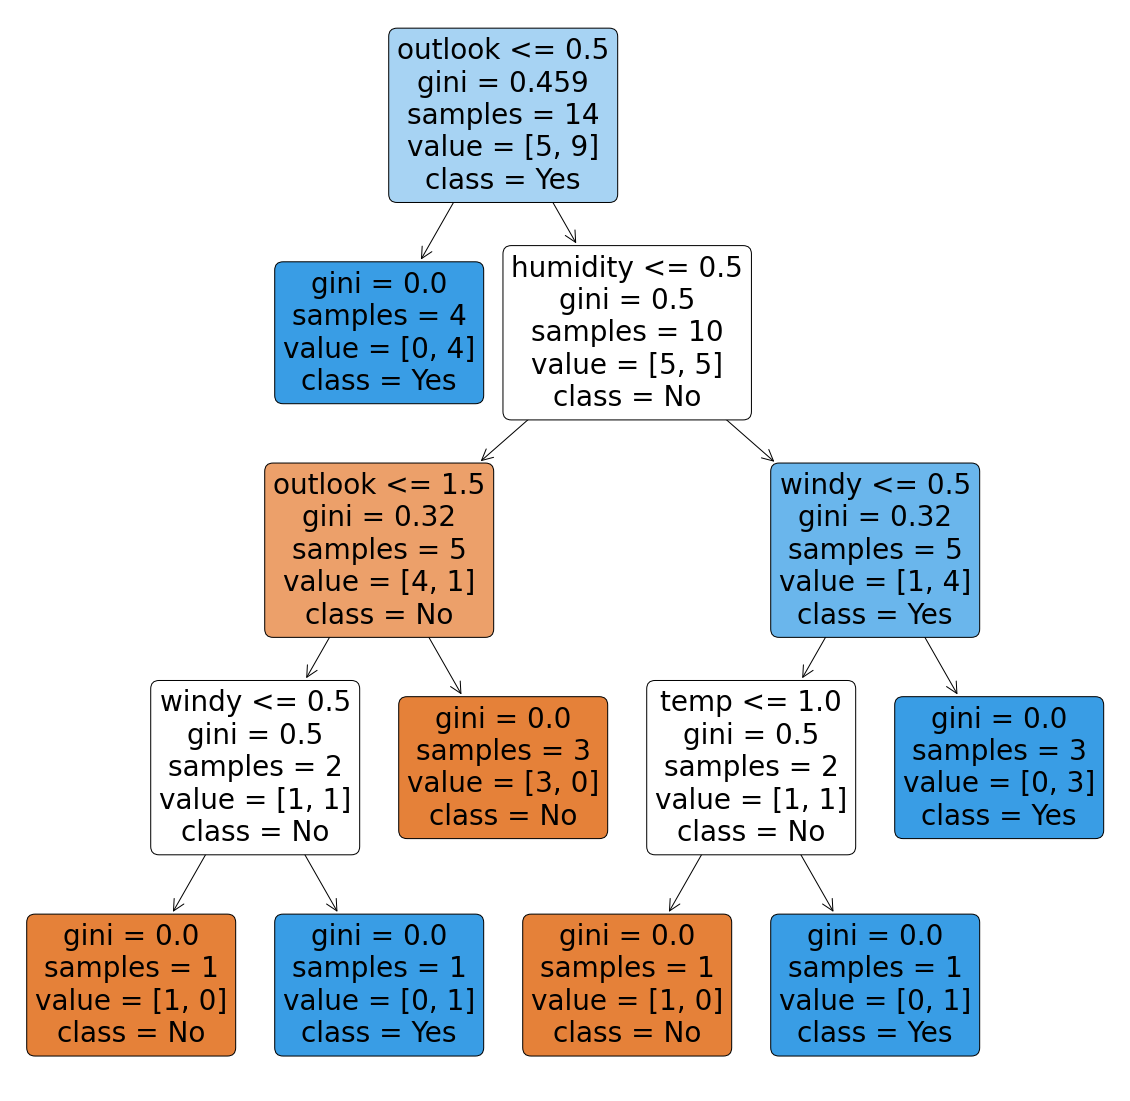

In [9]:
fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

graph=tree.plot_tree(clf,
                     feature_names=["outlook","temp","humidity","windy"],
                     class_names=["No","Yes"],
                     filled=True,rounded=True,ax=ax) 

## Random forest canonical exercise

### Load data (we are using pandas, Hurray!)

In [18]:
pdata = pd.read_csv('ctemp.csv')
pdata.head(10)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,7.2,7.2,7.6,7.2,6.1,10.0,6.7,-1.7
1,2016,1,2,Sat,6.7,7.2,7.6,6.7,5.0,10.0,6.7,16.1
2,2016,1,3,Sun,7.2,6.7,7.7,5.0,6.1,7.8,8.3,13.3
3,2016,1,4,Mon,6.7,5.0,7.7,4.4,6.7,8.9,7.8,11.7
4,2016,1,5,Tues,5.0,4.4,7.8,6.7,7.8,7.8,7.8,5.0
5,2016,1,6,Wed,4.4,6.7,7.8,10.6,6.1,9.4,8.9,4.4
6,2016,1,7,Thurs,6.7,10.6,7.9,7.2,7.2,9.4,7.8,3.3
7,2016,1,8,Fri,10.6,7.2,7.9,8.9,6.1,8.3,7.8,1.1
8,2016,1,9,Sat,7.2,8.9,8.0,10.0,7.8,10.0,7.2,8.3
9,2016,1,10,Sun,8.9,10.0,8.1,11.1,7.2,8.9,8.9,9.4


In [19]:
data = pdata.values
data

array([[2016, 1, 1, ..., 10.0, 6.7, -1.7],
       [2016, 1, 2, ..., 10.0, 6.7, 16.1],
       [2016, 1, 3, ..., 7.8, 8.3, 13.3],
       ...,
       [2016, 12, 29, ..., 10.0, 7.2, 18.3],
       [2016, 12, 30, ..., 7.8, 6.7, 5.6],
       [2016, 12, 31, ..., 8.9, 8.3, 13.9]], dtype=object)

### Data description
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the month
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average

Convert year+month+day to datetime, and plot it

In [20]:
date = []
for i in range(len(data[:,0])):
    date.append(datetime.date(data[:,0][i],data[:,1][i],data[:,2][i]))

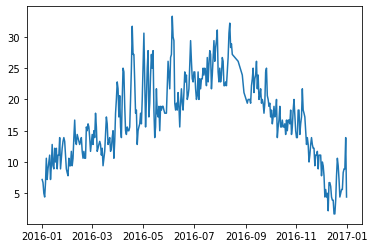

In [21]:
plt.plot(date,data[:,7]);

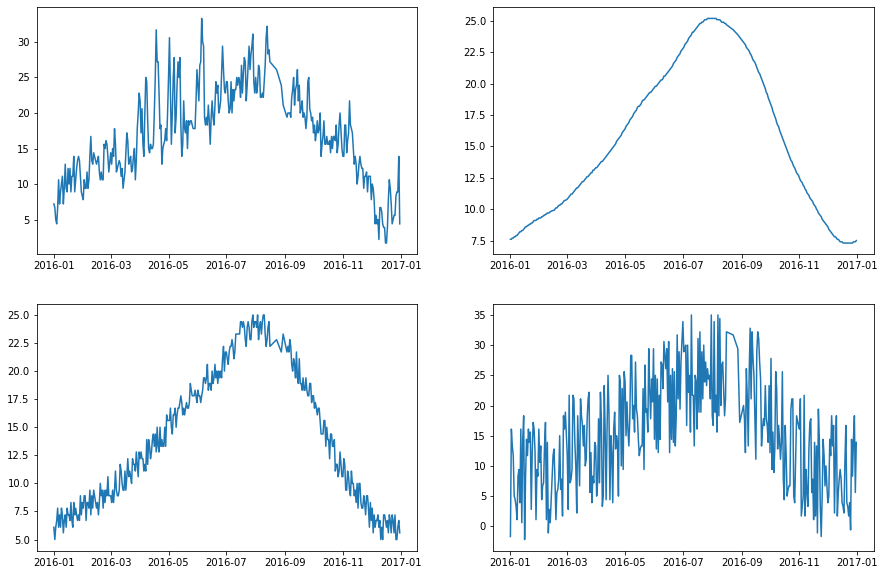

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
ax[0][0].plot(date,pdata['actual'])
ax[0][1].plot(date,pdata['average'])
ax[1][0].plot(date,pdata['forecast_noaa'])
ax[1][1].plot(date,pdata['friend']);

### TASK1: Change the data:
 * add columns: Mon, Tue, etc. which are 1 for the given day and 0 otherwise
 * remove the week column

Help for pandas:
 * add new column (returns a dataframe width a new column):
 <pre>pdata.assign(Mon = here comes a nice array with the given zeros and ones)</pre>
 `Mon` will be the name of the column
 * delete column (returns a dataframe width the column removed):
 <pre>tdata.drop(columns='week')</pre>
<img src="newtable_head.png">

In [23]:
tdata = pdata.assign(
    Mon=lambda x: 1 * (x['week'] == 'Mon'),
    Tues=lambda x: 1 * (x['week'] == 'Tues'),
    Wed=lambda x:  1 * (x['week'] == 'Wed'),
    Thur=lambda x:  1 * (x['week'] == 'Thur'),
    Fri=lambda x:  1 * (x['week'] == 'Fri'),
    Sat=lambda x:  1 * (x['week'] == 'Sat'),
    Sun=lambda x: 1 * (x['week'] == 'Sun'),
).drop('week', axis=1)
tdata

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,Mon,Tues,Wed,Thur,Fri,Sat,Sun
0,2016,1,1,7.2,7.2,7.6,7.2,6.1,10.0,6.7,-1.7,0,0,0,0,1,0,0
1,2016,1,2,6.7,7.2,7.6,6.7,5.0,10.0,6.7,16.1,0,0,0,0,0,1,0
2,2016,1,3,7.2,6.7,7.7,5.0,6.1,7.8,8.3,13.3,0,0,0,0,0,0,1
3,2016,1,4,6.7,5.0,7.7,4.4,6.7,8.9,7.8,11.7,1,0,0,0,0,0,0
4,2016,1,5,5.0,4.4,7.8,6.7,7.8,7.8,7.8,5.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,5.6,5.6,7.3,8.3,5.0,10.0,8.3,8.3,0,1,0,0,0,0,0
344,2016,12,28,5.6,8.3,7.4,8.9,5.0,9.4,6.7,14.4,0,0,1,0,0,0,0
345,2016,12,29,8.3,8.9,7.4,8.9,6.1,10.0,7.2,18.3,0,0,0,0,0,0,0
346,2016,12,30,8.9,8.9,7.4,13.9,6.7,7.8,6.7,5.6,0,0,0,0,1,0,0


### Create train and test dataset
First features and target is created. The new table with only numerical data is in tdata

With numpy:
 * target = data[:,7]
 * input = data[:,np.arange(len(data[0]))!=7][0]

In [24]:
data = tdata.values
target = data[:,7]
features = data[:,np.arange(len(data[0]))!=7]

#### Cut the data into train and test

In [25]:
train_f, test_f, train_t, test_t = train_test_split(features, target, test_size=0.2)
tdata = tdata.drop("actual", axis =1)

In [26]:
train_f

array([[2.016e+03, 1.100e+01, 1.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 9.000e+00, 1.900e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 6.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [2.016e+03, 1.100e+01, 1.400e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 6.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.016e+03, 1.200e+01, 2.000e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [27]:
train_t

array([10.6, 18.3,  6.7, 15.6, 22.8, 21.7,  6.1, 14.4, 13.3, 11.7,  6.1,
        7.2, 18.9, 15. , 25. , 12.8, 10. , 18.9, 13.9, 23.3, 17.8, 15.6,
       18.9, 11.1,  8.9, 10.6,  7.2, 23.9, 11.7, 23.9, 23.3, 18.9,  6.7,
        6.7, 21.1,  8.3, 17.8,  6.1, 22.8,  7.8, 14.4, 23.9,  8.9, 13.3,
        7.8,  8.9, 14.4, 24.4, 12.2,  6.7, 18.3,  5.6, 11.1, 25. , 18.9,
       19.4, 12.8, 20.6, 10.6,  6.7, 25. , 11.7,  6.7,  6.1,  9.4, 15.6,
       15.6,  7.8, 17.8, 20.6,  7.2, 16.7, 21.7, 10. ,  7.2, 16.1, 20. ,
        8.9, 22.2, 16.1, 16.7, 16.7, 22.2, 24.4, 19.4, 14.4, 22.2, 20. ,
        7.8, 19.4, 17.8, 16.7, 12.2, 13.3, 22.8, 11.1, 16.7,  6.7, 18.3,
       13.3, 22.8, 19.4,  9.4,  7.8, 15. ,  6.1, 20.6, 24.4, 16.1, 22.8,
        9.4, 23.9,  9.4,  8.3,  8.3, 18.9, 17.2,  8.3,  9.4,  9.4,  8.3,
        8.9, 13.3, 19.4,  5. , 21.7, 21.7,  7.2, 22.2,  7.2, 10. , 10. ,
       17.8,  8.9, 10. , 17.2,  9.4,  8.9, 19.4, 18.9,  8.3, 12.2,  7.8,
       17.8,  7.2, 16.7, 17.8, 22.2, 22.2, 13.3, 21

#### Fit data with random forest and predict test data

In [28]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 12345)
rf.fit(train_f, train_t);

In [29]:
predictions = rf.predict(test_f)

### TASK2: Calculate error:
 1. Calculate the mean square difference of the prediction and the actual data
 2. Calculate the mean square difference of the average and the actual data

In [30]:
print(((predictions - test_t)**2).mean())
print(((predictions.mean() - test_t)**2).mean())

0.9942438714285748
33.768710932448975


#### Example decision tree

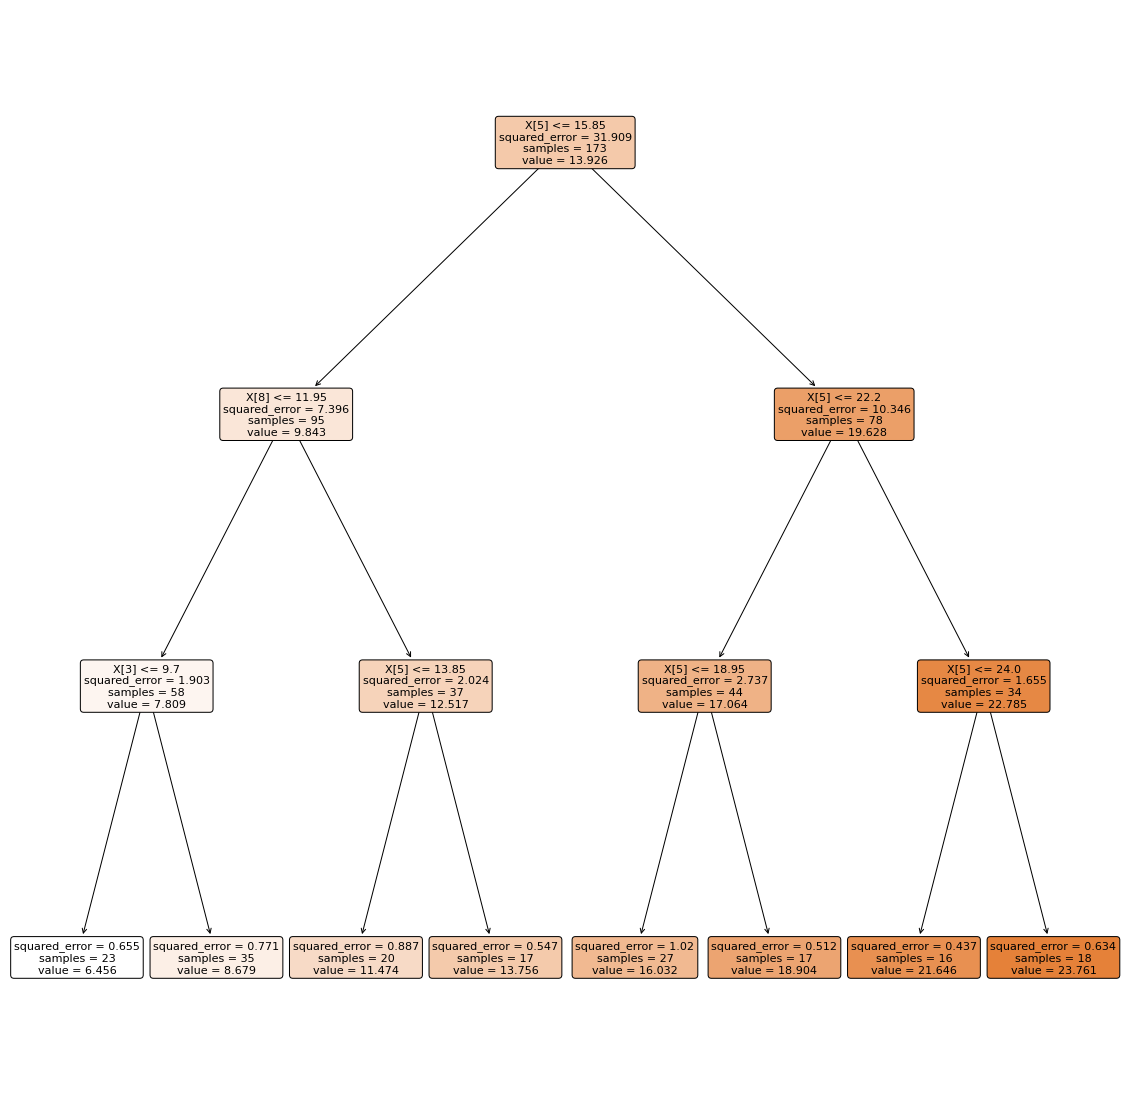

In [31]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_f, train_t)
fig=plt.figure(figsize=(20,20))
ax=plt.subplot(111)

graph=tree.plot_tree(rf_small.estimators_[0],filled=True,rounded=True,ax=ax) 

### TASK3: the following inctruction calculates the importances of the given parameters
 * Your task is to plot the importances as shown
 <img src="importances.png">

In [32]:
importances = list(rf.feature_importances_)

In [33]:
importances

[0.0,
 0.0003574122843842616,
 0.0014482816990295314,
 0.0027883384391923544,
 0.0019531203316441707,
 0.8673123140984893,
 0.0014754249687171078,
 0.03814773297659986,
 0.08293673558142921,
 0.001872927995978934,
 0.00017967915394012941,
 0.0003748203091341411,
 0.00029897984140549877,
 0.0,
 0.0003456951161475728,
 0.00034803106781167804,
 0.00016050613609629654]

<BarContainer object of 17 artists>

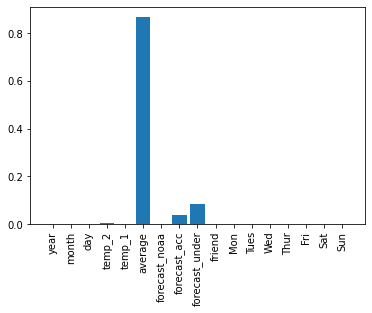

In [34]:
plt.xticks(range(len(tdata.columns)), tdata.columns, rotation='vertical')
plt.bar(range(len(tdata.columns)), importances)

### Unsupervised random forest
(for details see lecture)

In [35]:
N = 100
np.random.seed(12347)

Create three patches of points

In [36]:
x = np.zeros((N,2),dtype=float)
N0 = int(N*0.2)
N1 = int(N*0.5)
N2 = N-N0-N1
x[0:N0,0] = np.random.normal(0.3,0.1,N0)
x[0:N0,1] = np.random.normal(0.7,0.1,N0)
x[N0:N0+N1,0] = np.random.normal(0.7,0.1,N1)
x[N0:N0+N1,1] = np.random.normal(0.3,0.1,N1)
x[N0+N1:,0] = np.random.normal(0.2,0.1,N2)
x[N0+N1:,1] = np.random.normal(0.2,0.1,N2)

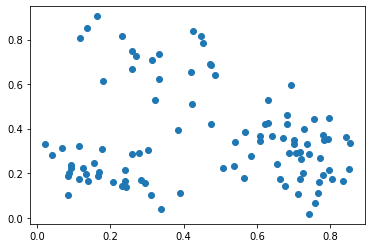

In [37]:
plt.scatter(x[:,0],x[:,1]);

In [38]:
#create random synthetic data
NY = 200
y = np.random.random((NY,2))

In [39]:
z = np.zeros((NY+N,2),dtype=float)
t = np.zeros(NY+N,dtype=int)
z[:N] = x
z[N:] = y
t[N:] = 1

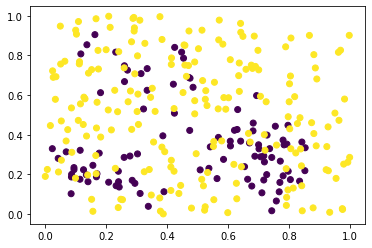

In [40]:
plt.scatter(z[:,0],z[:,1],c=t);

#### Example decision tree
clf.apply() shows which leave the data landed at

In [41]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(z, t)
res = clf.apply(x)
print(res)

[125 134 125 108 136 134 117 112 120 120 108 134 125 132 136 134 120 136
 119 125  10  96  80  84 140 147 140  80   7  96  77  80  98  80  98  80
  88  80  57  80  90  57  96  80  72  84  96  64  64  72  55  80  72  98
  90  75 149  80  80  77  52  71 140  84  55  80  72  90  80  72  28  48
  22  28  41  39  41  22  22  28  22  28  41  20  31  22  10  41  22  20
  22  28  36  22  39  31  22  28  22  39]


### TASK 4: Write an example random forest
Create 100 random trees, and collect co-occurrence data:
 1. create an 2d array for the count of co-occurrence data (`NxN`)
 * randomly select ~30% of the points from the N+NY data points
 * fit a decision tree with these points
 * apply the decision tree to the original data (first N). Use `clf.apply`
 * find pairs have same resulting leave (you have to iterate with `i` and the again with `j` through all points). Points are on the same leaf if `clf.apply` gives the same result for both datapoints
 * increase co-occurrence matrix value by one for these pairs

In [42]:
clf = tree.DecisionTreeClassifier()
dist = np.zeros((N, N), dtype = float)

for _ in range(100):
  mask = np.random.random(len(z)) < 0.30
  features = z[mask]
  target = t[mask]
  clf = clf.fit(features, target)
  res = clf.apply(x)
  
  for i in range(N):
    for j in range(i + 1, N):
      if res[i] == res[j]: 
        dist[i][j] += 1
        dist[j][i] += 1

### TASK 5: plot the co-occurrence matrix
You should be able to see three bright boxes

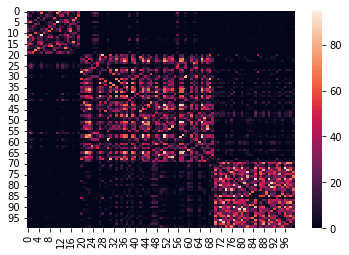

In [43]:
import seaborn as sns
sns.heatmap(dist)

### TASK 6: normalize the co-occurence matrix line by line

This task is optional, generally normalization might be a good idea here it is not needed.

After normalization the sum of elements in a row should be 1

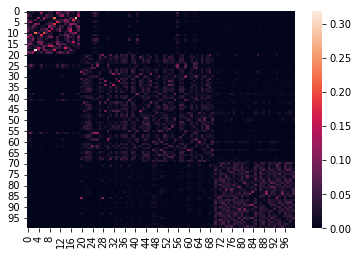

In [44]:
from sklearn.preprocessing import normalize
norm_dist = normalize(dist, axis=1, norm='l1')
sns.heatmap(norm_dist)

## k-means clustering

### Perform k-means clustering using the similarity matrix

Though the similarity matrix might be used as an inverse distance between point pairs. We can use it directly as input data. Points in the same group have similar structure thus k-means clustering will work fine with them

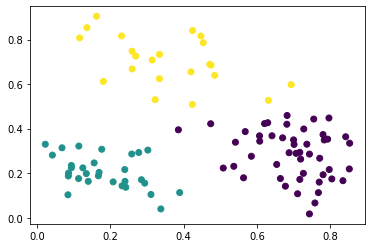

In [45]:
kmeans = KMeans(n_clusters = 3).fit(norm_dist)
plt.scatter(x[:,0], x[:,1], c = kmeans.labels_)

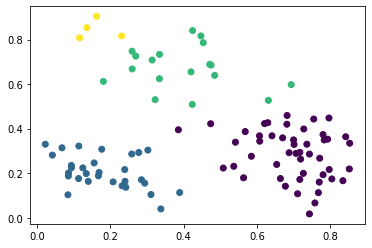

In [46]:
kmeans = KMeans(n_clusters = 4).fit(norm_dist)
plt.scatter(x[:,0], x[:,1], c = kmeans.labels_)